In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = None
with open('Москва_2021.txt') as file:
    data = [int(line.rstrip()) for line in file]

# print(data)

1. Построить статистический ряд распределения.

23  :  1071
32  :  796
27  :  1263
26  :  980
44  :  1032
49  :  1060
63  :  183
34  :  869
66  :  188
38  :  1006
28  :  1113
35  :  676
46  :  677
62  :  139
22  :  944
31  :  1115
37  :  522
18  :  806
29  :  1340
30  :  734
20  :  910
69  :  202
36  :  1198
25  :  1050
48  :  1026
40  :  723
21  :  716
45  :  690
41  :  837
24  :  810
19  :  971
67  :  128
42  :  978
33  :  758
57  :  136
47  :  831
43  :  820
55  :  62
51  :  188
39  :  695
52  :  193
56  :  76
60  :  266
64  :  189
61  :  226
16  :  236
15  :  53
58  :  262
50  :  150
53  :  47
65  :  79
59  :  74
71  :  85
14  :  49
17  :  126
70  :  26
73  :  17
54  :  26


(array([ 102.,  362., 1777., 1626., 2015., 1860., 2243., 2453., 1849.,
        1554., 1545., 1720., 1701., 1560., 1798., 1722., 1508., 2086.,
         338.,  240.,   88.,  212.,  336.,  492.,  322.,  268.,  316.,
         202.,  111.,   17.]),
 array([14.        , 15.96666667, 17.93333333, 19.9       , 21.86666667,
        23.83333333, 25.8       , 27.76666667, 29.73333333, 31.7       ,
        33.66666667, 35.63333333, 37.6       , 39.56666667, 41.53333333,
        43.5       , 45.46666667, 47.43333333, 49.4       , 51.36666667,
        53.33333333, 55.3       , 57.26666667, 59.23333333, 61.2       ,
        63.16666667, 65.13333333, 67.1       , 69.06666667, 71.03333333,
        73.        ]),
 <BarContainer object of 30 artists>)

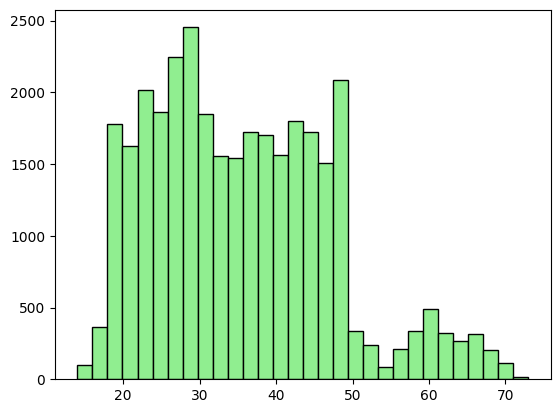

In [203]:
num_of_occurrences = {}

for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

for val in num_of_occurrences:
     print(val, " : ", num_of_occurrences[val])

plt.hist(data, color='lightgreen', ec='black', bins=30)

Text(0, 0.5, 'Частота')

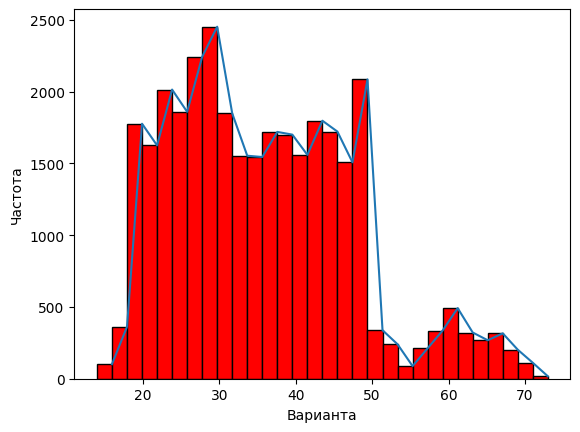

In [204]:
counts, bins = np.histogram(data, bins=30)

plt.hist(data, color='red', ec='black', bins=30)
plt.plot(bins[1:], counts)


plt.xlabel("Варианта")
plt.ylabel("Частота")

3. Реализовать функции для определения следующих статистических
характеристик: средняя, дисперсия, среднее квадратическое отклонение,
коэффициент вариации, мода и ее частота, медиана, максимальное и
минимальное значение, размах, наибольшее и наименьшее второе
значение, асимметрия, эксцесс.

In [205]:
def count_avg(data: list):
    return sum(data) / len(data)

def count_mathematical_expectation(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = 0

    for val in num_of_occurrences:
        mat_exp += (num_of_occurrences[val] / len(data)) * val

    return mat_exp


def count_dispersion(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = count_mathematical_expectation(data)
    dispersion = 0

    for val in num_of_occurrences:
        dispersion += (val - mat_exp) ** 2 * (num_of_occurrences[val] / len(data))
    
    return dispersion


def count_sko(data):
    return count_dispersion(data) ** 0.5


def count_var_coef(data):
    return count_sko(data) / count_mathematical_expectation(data)

def count_moda(data):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    max_val = max(num_of_occurrences, key=num_of_occurrences.get)
    max_val_freq = num_of_occurrences[max_val] / len(data)

    return [max_val, num_of_occurrences[max_val], len(data)]

def count_razmax(data):
    return max(data) - min(data)

def find_second_max_and_min(data):

    sorted_data = sorted(set(data))
    
    return sorted_data[1], sorted_data[-2]

def find_k_momentum(data: list, k: int):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    mat_exp = count_mathematical_expectation(data)

    momentum = 0

    for val in num_of_occurrences:
        momentum += (val - mat_exp) ** k * (num_of_occurrences[val] / len(data))
    
    return momentum

def count_asymmetry(data):
    return find_k_momentum(data, 3) / (count_sko(data) ** 3)

def count_excess(data):
    return find_k_momentum(data, 4) / (count_sko(data) ** 4) - 3


def count_median(data):
    if len(data) % 2 == 1:
        m = (len(data)-1) // 2
        return sorted(data)[m+1]
    else:
        m = len(data) // 2
        return (sorted(data)[m] + sorted(data)[m+1])/2



print("средняя: ", count_avg(data))
print("дисперсия: ", count_dispersion(data))
print("среднее квадратическое отклонение: ", count_sko(data))
print("коэффициент вариации: ", count_var_coef(data))
print("максимальное и минимальное значение: ", max(data), min(data))
print("размах: ", count_razmax(data))
print("асимметрия: ", count_asymmetry(data))
print("эксцесс: ", count_excess(data))

print('----------')
print("наибольшее и наименьшее второе значение: ", find_second_max_and_min(data))
print("мода и ее частота: ", count_moda(data)[0],' ; ' ,count_moda(data)[1])

print("медиана: ",count_median(data) )

# mode freq

средняя:  35.37300681614903
дисперсия:  144.91696806481485
среднее квадратическое отклонение:  12.038146371631093
коэффициент вариации:  0.34032013264236427
максимальное и минимальное значение:  73 14
размах:  59
асимметрия:  0.6225379970646611
эксцесс:  -0.06016734210583552
----------
наибольшее и наименьшее второе значение:  (15, 71)
мода и ее частота:  29  ;  1340
медиана:  34


4. Проверить правило трех сигм. Сделать вывод о том, подчиняется ли
случайная величина «возраст» нормальному распределению.

In [206]:
def count_elements_in_range(lst, a, b):
    count = 0
    for element in lst:
        if a <= element <= b:
            count += 1
    return count

mat_exp = count_mathematical_expectation(data)
sko = count_sko(data)

print('мат. ожидание: ', mat_exp)
print('СКО: ', sko)

percent_of_elems_in_range_1sigma = count_elements_in_range(data, mat_exp-sko, mat_exp+sko) / len(data) * 100
percent_of_elems_in_range_2sigma = count_elements_in_range(data, mat_exp-2*sko, mat_exp+2*sko) / len(data) * 100
percent_of_elems_in_range_3sigma = count_elements_in_range(data, mat_exp-3*sko, mat_exp+3*sko) / len(data) * 100


print("% реализаций лежащих в интервале (𝑎 − 𝜎, 𝑎 + 𝜎)", percent_of_elems_in_range_1sigma)
print("% реализаций лежащих в интервале (𝑎 − 2𝜎, 𝑎 + 2𝜎)", percent_of_elems_in_range_2sigma)
print("% реализаций лежащих в интервале (𝑎 − 3𝜎, 𝑎 + 3𝜎)", percent_of_elems_in_range_3sigma)


мат. ожидание:  35.37300681614903
СКО:  12.038146371631093
% реализаций лежащих в интервале (𝑎 − 𝜎, 𝑎 + 𝜎) 66.35104709619715
% реализаций лежащих в интервале (𝑎 − 2𝜎, 𝑎 + 2𝜎) 94.6704499892052
% реализаций лежащих в интервале (𝑎 − 3𝜎, 𝑎 + 3𝜎) 99.94756808438454


=> случайная величина «возраст» не подчиняется нормальному распределению; вывод сделан на основе графических и числовых данных

5. Построить графически статистическую функцию распределения,
используя накопленные частоты.

<BarContainer object of 58 artists>

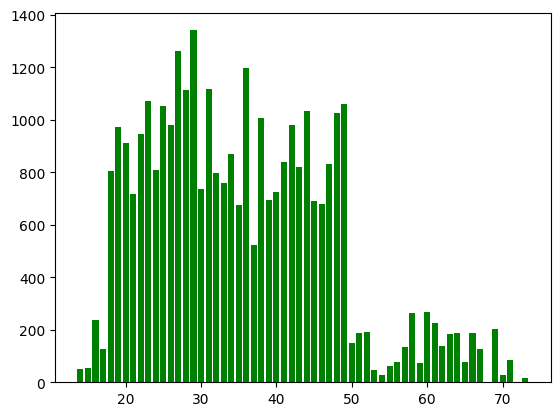

In [207]:
# counts, bins = np.histogram(data, bins=30)

# plt.xlabel("Варианта")
# plt.ylabel("Частота")

# plt.plot(bins[1:], counts)

num_of_occurrences = {}

first_time = True

prev_val = None

for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 


graph_data = {}

prev_val = None
for val in sorted(num_of_occurrences):
        if prev_val:
            graph_data[val] = graph_data[prev_val] + num_of_occurrences[val] 
        else:
            graph_data[val] = num_of_occurrences[val]


        prev_val = val

sko = count_sko(data)
mat_exp = count_mathematical_expectation(data)


def plot_func(x):
    return 1 / (sko * (2*3.1415)**0.5) * 2.7 ** ( -(x - mat_exp)**2 / (2 * sko**2))




x = [val for val in range(0,80)]
y = [plot_func(val) for val in x]

plt.bar(list(num_of_occurrences.keys()), num_of_occurrences.values(), color='g')


<BarContainer object of 58 artists>

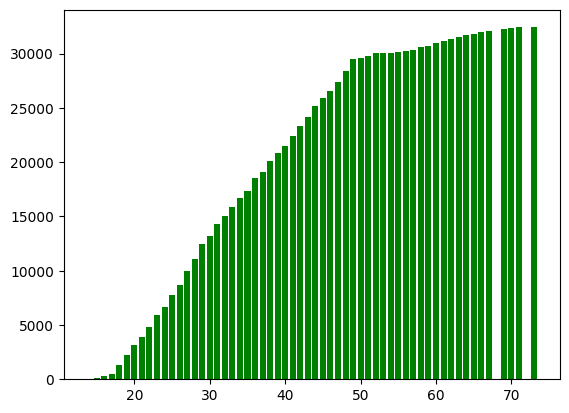

In [208]:
plt.bar(list(graph_data.keys()), graph_data.values(), color='g')


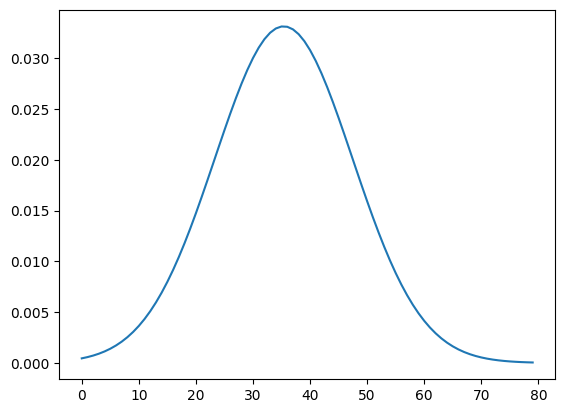

In [209]:
plt.plot(x,y)
# plt.show()

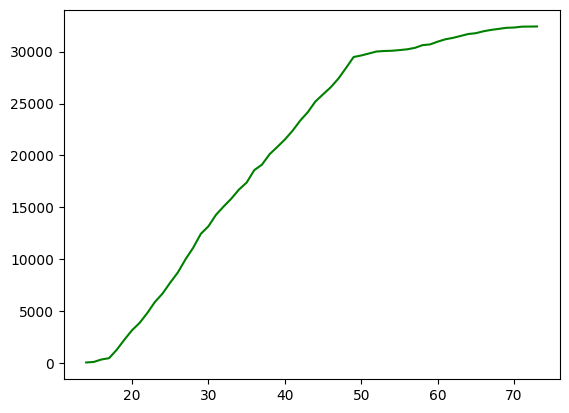

In [210]:
plt.plot(list(graph_data.keys()), graph_data.values(), color='g')
